### HW2___Q3: Latin Alphabet


In [26]:

import numpy as np 
import pandas as pd 
import os
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential


In [28]:
from google.colab import drive 
drive.mount('/content/gdrive')
csv_train = pd.read_csv('gdrive/MyDrive/golab/datasets/Q3_train.csv', sep=',', skiprows=1, header=None)
x_df = csv_train.drop(csv_train.columns[0], axis=1).div(255).to_numpy()
y_df = csv_train.drop(csv_train.columns[1:], axis=1)
XX = []
for row in x_df:
    XX.append(np.reshape(row, (28, 28)))
x_train=np.array(XX)
y_train=y_df[0].to_numpy()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Q3: part A
first, 9 randomly selected images are
being displayed

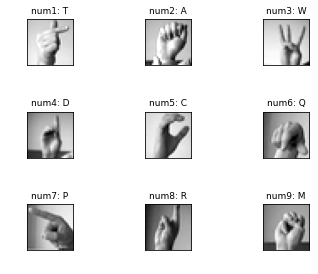

In [29]:
import random
from PIL import ImageDraw, Image, ImageFont
from matplotlib import pyplot as plt
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
          'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
          'T', 'U', 'V', 'W', 'X', 'Y']

for index, picture in enumerate(x_train):
    
    if index < 9:
        ind=random.randint(1,27455)
        picture=x_train[ind]
        img = Image.fromarray(np.uint8(picture * 255), 'L')
        plt.subplot(3, 3, index+1)
        plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
        plt.subplots_adjust(bottom=0.1, top=0.9, wspace=None, hspace=1)
        plt.title("num"+str(index+1) + ": " + str(labels[y_train[ind]]), fontsize=9)
        plt.imshow(img, cmap='gray')
    else:
        break
plt.show()

In [30]:
train=pd.read_csv('gdrive/MyDrive/golab/datasets/Q3_train.csv')
test=pd.read_csv('gdrive/MyDrive/golab/datasets/Q3_test.csv')
X_train=train.drop(columns=["label"])
y_train=train["label"]
y_train=keras.utils.to_categorical(y_train,25)
X_test=test.drop(columns=["label"])
y_test=test["label"]
y_test=keras.utils.to_categorical(y_test,25)
X_train=np.array(X_train,dtype="float32")
X_test=np.array(X_test,dtype="float32")
X_train/=255
X_test/=255

## Q3: part B<br/>
the model is architected here<br/>
I used keras to implement my model<br/>
it has 4 layers equiped with ReLU ac func


In [97]:
model=Sequential()
model.add(Dense(512,activation="relu",input_shape=(784,),name="first_layer"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu",name="second_layer"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu",name="third_layer"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu",name="fourth_layer"))
model.add(Dropout(0.2))
model.add(Dense(25,activation="softmax",name="output_layer"))

In [98]:
model.compile(optimizer="ADAM",loss="categorical_crossentropy",metrics=["accuracy"])

In [99]:
history =model.fit(X_train,y_train,epochs=30,batch_size=100,validation_split=0.2)

Epoch 1/30
220/220 [==============================] - 4s 16ms/step - loss: 2.9599 - accuracy: 0.1033 - val_loss: 2.2035 - val_accuracy: 0.2881
Epoch 2/30
220/220 [==============================] - 3s 15ms/step - loss: 2.0991 - accuracy: 0.2863 - val_loss: 1.6693 - val_accuracy: 0.4316
Epoch 3/30
220/220 [==============================] - 3s 15ms/step - loss: 1.6577 - accuracy: 0.4268 - val_loss: 1.1606 - val_accuracy: 0.6225
Epoch 4/30
220/220 [==============================] - 3s 15ms/step - loss: 1.4096 - accuracy: 0.5098 - val_loss: 1.0074 - val_accuracy: 0.6582
Epoch 5/30
220/220 [==============================] - 3s 15ms/step - loss: 1.2545 - accuracy: 0.5648 - val_loss: 0.8416 - val_accuracy: 0.7146
Epoch 6/30
220/220 [==============================] - 3s 15ms/step - loss: 1.0933 - accuracy: 0.6134 - val_loss: 0.7368 - val_accuracy: 0.7490
Epoch 7/30
220/220 [==============================] - 3s 14ms/step - loss: 0.9987 - accuracy: 0.6492 - val_loss: 0.6152 - val_accuracy: 0.7946

In [85]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy with SGD no dropout')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'test'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss with SGD no dropout')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'test'], loc='best')
    plt.show()

## Q3: part B
The model was trained by both SGD and ADAM<br/>
actually Unlike maintaining a single learning rate through training in SGD, Adam optimizer updates the learning rate for each network weight individually.<br/>SGD produces the same performance as regular gradient descent when the learning rate is low. Adam's optimization method computes individual adaptive learning rates for different parameters from estimates of the first and second moments of the gradients.
***It's good to say the SGD model needed more epochs to be trained and ADAM model overfitted faster***,
***I trained SGD for 50 epochs but ADAM for 30 epochs ***

<ipython-input-71-df82b598d224>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-71-df82b598d224>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


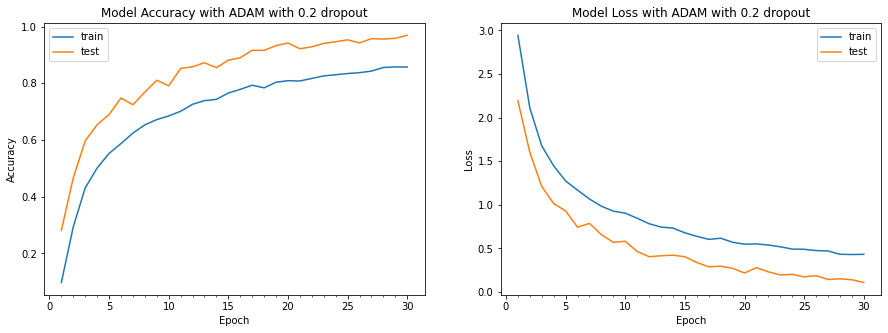

In [72]:
plot_model_history(history)

<ipython-input-66-5b3b798fcc93>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-66-5b3b798fcc93>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


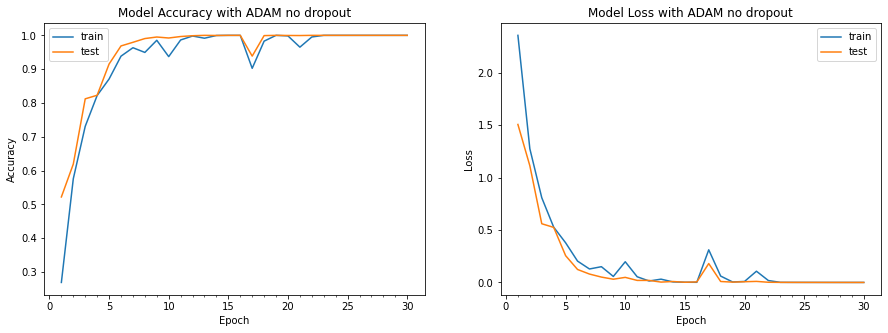

In [67]:
plot_model_history(history)

## Q3: part G
I used dropout too<br/>
Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
Dropout roughly doubles the number of iterations required to converge. However, training time for each epoch is less.
With H hidden units, each of which can be dropped, we have
2^H possible models. In testing phase, the entire network is considered and each activation is reduced by a factor p.
as I can see, with ADAM optimizer, the model is overfitted after almost 7 epochs and dropout made it be trained better and regularized the model.

<ipython-input-76-4978b9178bfb>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-76-4978b9178bfb>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


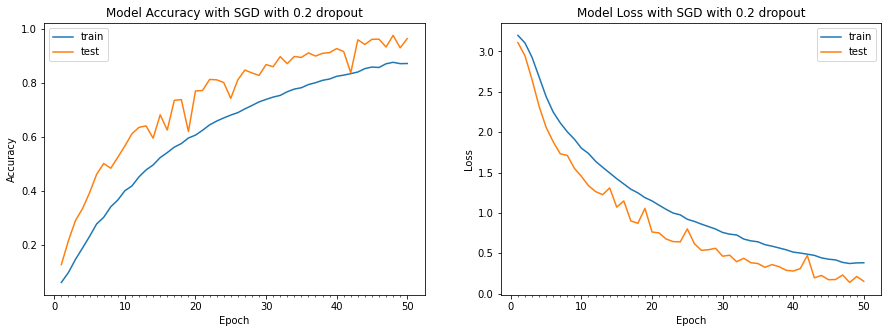

In [81]:
plot_model_history(history)

<ipython-input-85-39fbad6fee0a>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-85-39fbad6fee0a>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


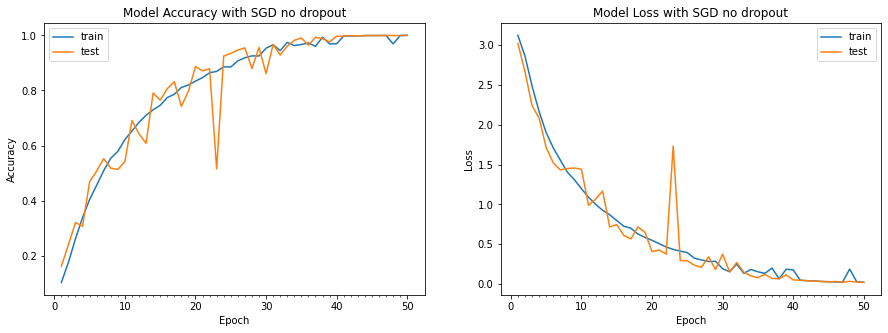

In [86]:
plot_model_history(history)

## Q3: part D
best model was trained had Test_Acuuracy= 78%<br/>
which was trained using ADAM optimizer and 0.2 dropout for each layer<br/>
It had 4 hidden layers and was trained for 30 epoch and batch size of 100
 

In [109]:
test=model.evaluate(X_test,y_test)


225/225 [==============================] - 2s 8ms/step - loss: 0.7847 - accuracy: 0.7773


In [100]:
from keras.models import load_model

model.save('my_model.h5') 

## Q3: part H **(Bonus)**
I used real time camera here and took screenshut to have 3 samples from this model, the suprising part is here, **It works!**

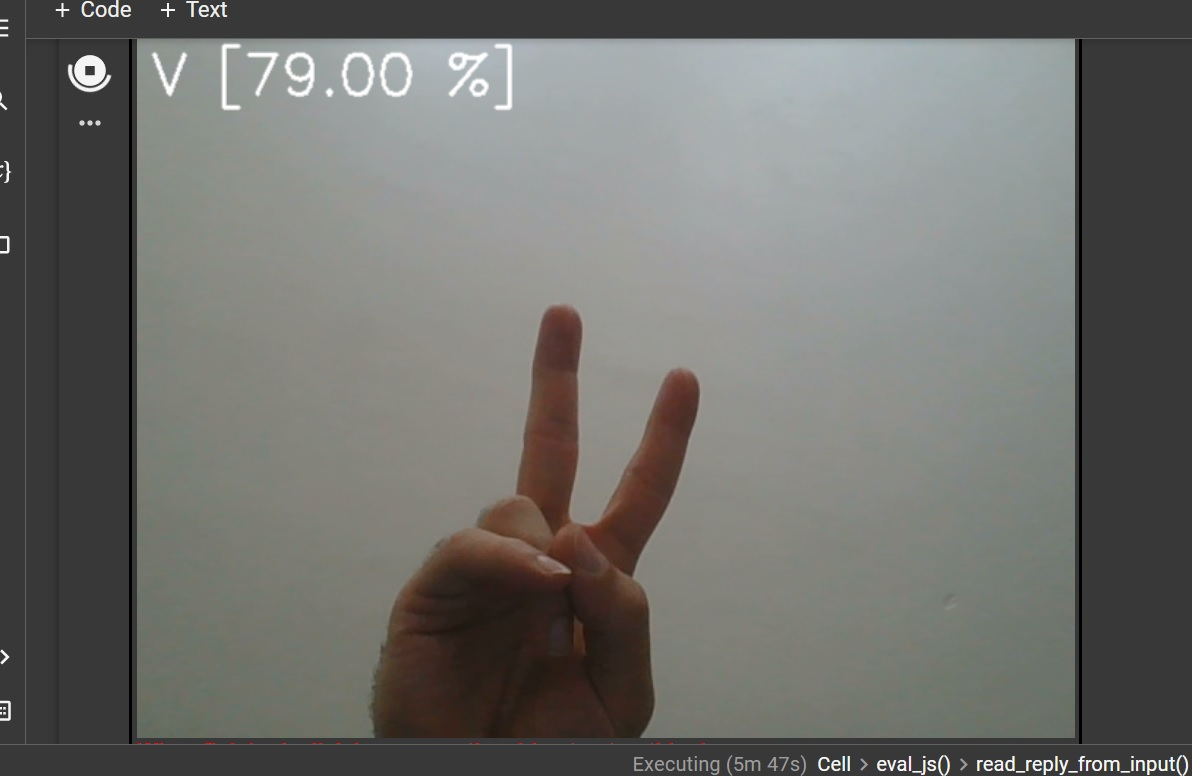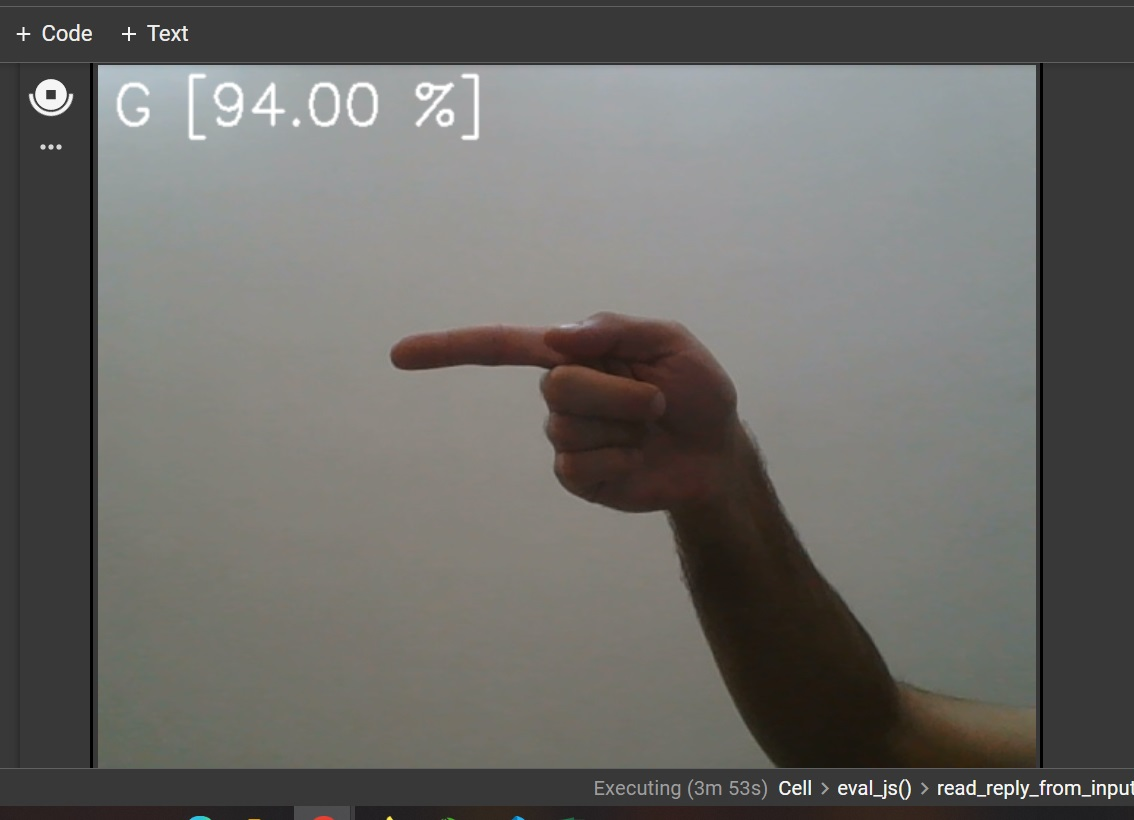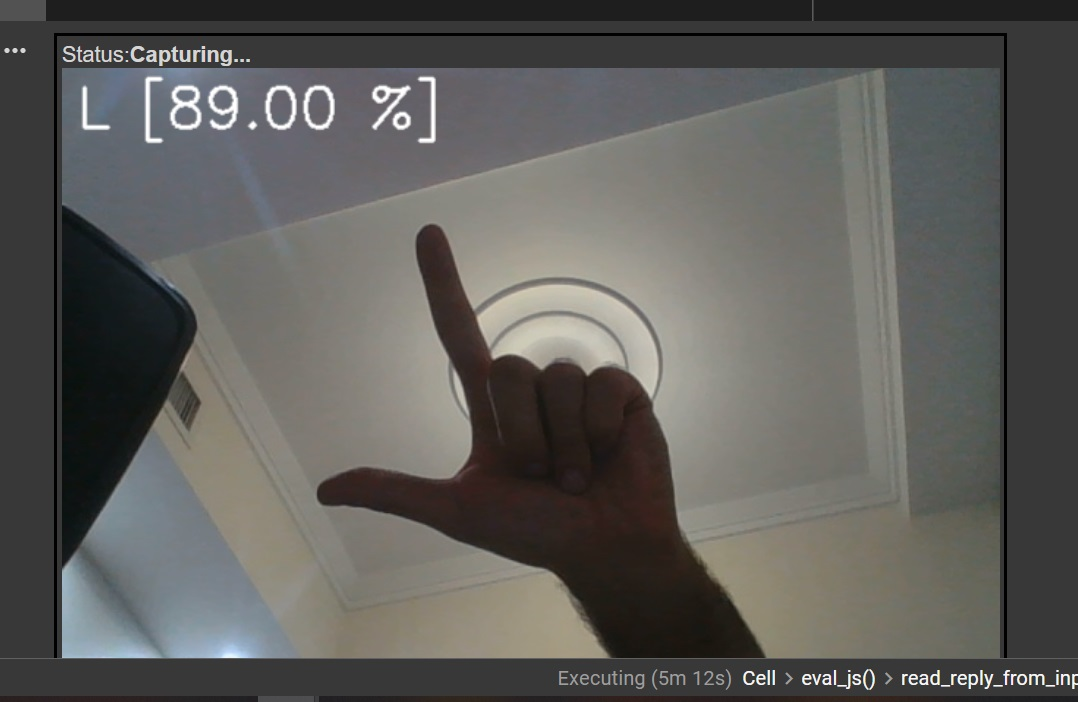

In [102]:
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import tensorflow as tf
from keras.models import load_model
import cv2
tf.keras.layers.Softmax (axis=-2 * 3.0)
so_lay = tf.keras.layers.Softmax()

def js_to_image(js_reply):


    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img


def bbox_to_bytes(bbox_array):

    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    # format bbox into png for return
    bbox_PIL.save(iobuf, format='png')
    # format return string
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
    return bbox_bytes

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
      stream.getVideoTracks()[0].stop();
      video.remove();
      div.remove();
      video = null;
      div = null;
      stream = null;
      imgElement = null;
      captureCanvas = null;
      labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
          
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')
  display(js)


class_count = 25
valid_data_percentage = 0.2
tf.compat.v1.reset_default_graph()
model = load_model('my_model.h5') 
label_html = 'Capturing...'
bbox = ''
count = 0 

video_stream()
while True:
        js_reply = eval_js('stream_frame("{}", "{}")'.format(label_html, bbox))
        if not js_reply:
            break
        frame = js_to_image(js_reply["img"])
        bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (28, 28)) / 255
        resize=tf.reshape(resize,(1, 784),name=None)
        y_pred = model.predict(resize,verbose = 0)
  
        text = labels[np.argmax(so_lay(y_pred).numpy())] + " [" + "{:.2f}".format( 100-np.argmax(so_lay(y_pred).numpy()) ) + " %]"
        cv2.putText(
            bbox_array,                 # Frame to put
            text,                       # Text to show
            (10, 40),                   # Position
            cv2.FONT_HERSHEY_SIMPLEX,   # Font family
            1.3,                        # Font size
            (255,255,255),              # Font color
            2,                          # Font Stroke
            cv2.LINE_4                  # ?
        )
        bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
        bbox = bbox_to_bytes(bbox_array)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


<IPython.core.display.Javascript object>